In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [3]:
# Augment and increase size by 100%
percentages = {
    MODE.RANDOM: 0.5,          # 50% of data for random augmentation
    MODE.SYNONYM: 0.5,         # 50% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_data_list],
    "label": [item["label"] for item in augmented_data_list]
}, features=features)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets([original_train_data, augmented_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 50% augmentation: {len(augmented_train_data)}")

Original train size: 8530
Train size after 50% augmentation: 17058


In [4]:
pipeline_augmented= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [5]:
pipeline_augmented.train_model(n_epochs=10)

evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]


Epoch: 1/10
Train Loss: 0.645, Train Acc: 0.650
Valid Loss: 0.597, Valid Acc: 0.716


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.95it/s]


Epoch: 2/10
Train Loss: 0.559, Train Acc: 0.752
Valid Loss: 0.549, Valid Acc: 0.759


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.02it/s]


Epoch: 3/10
Train Loss: 0.520, Train Acc: 0.793
Valid Loss: 0.531, Valid Acc: 0.778


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.47it/s]


Epoch: 4/10
Train Loss: 0.484, Train Acc: 0.832
Valid Loss: 0.522, Valid Acc: 0.787


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.43it/s]


Epoch: 5/10
Train Loss: 0.466, Train Acc: 0.851
Valid Loss: 0.508, Valid Acc: 0.798


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.30it/s]


Epoch: 6/10
Train Loss: 0.440, Train Acc: 0.878
Valid Loss: 0.496, Valid Acc: 0.816


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.89it/s]


Epoch: 7/10
Train Loss: 0.423, Train Acc: 0.897
Valid Loss: 0.490, Valid Acc: 0.818


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.79it/s]


Epoch: 8/10
Train Loss: 0.411, Train Acc: 0.908
Valid Loss: 0.482, Valid Acc: 0.828


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  5.81it/s]


Epoch: 9/10
Train Loss: 0.401, Train Acc: 0.918
Valid Loss: 0.481, Valid Acc: 0.826


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.13it/s]

Epoch: 10/10
Train Loss: 0.394, Train Acc: 0.923
Valid Loss: 0.473, Valid Acc: 0.837


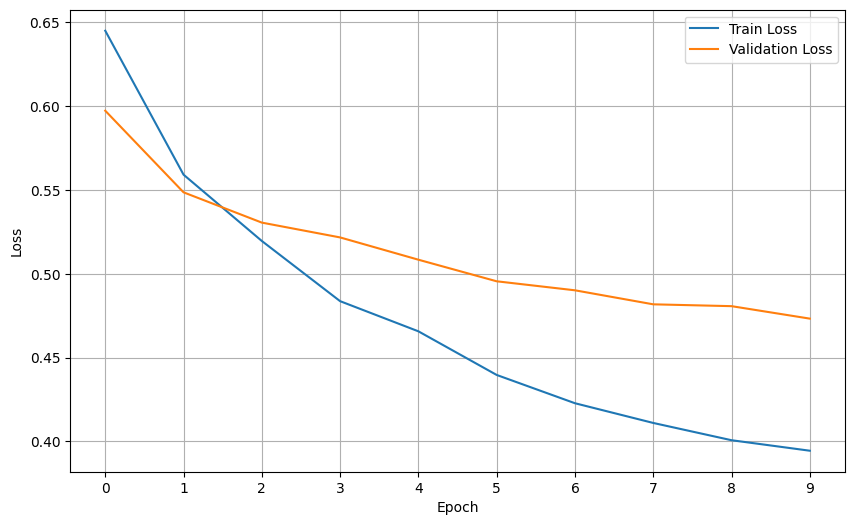

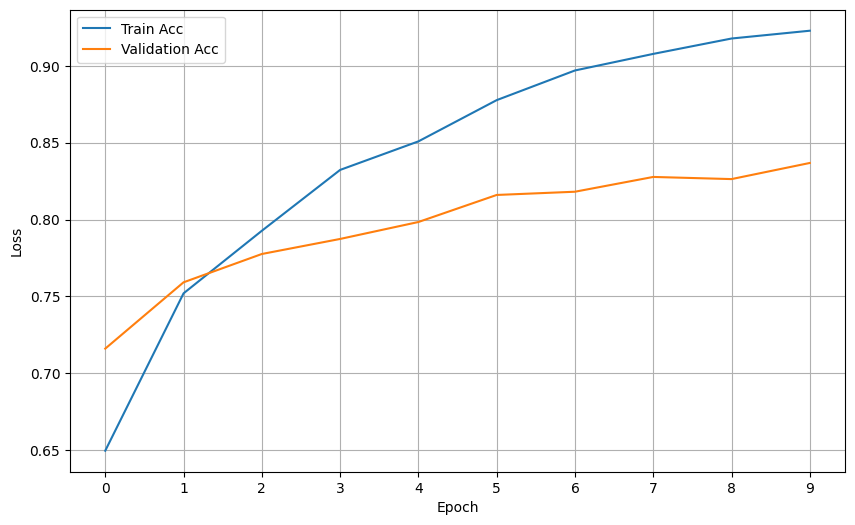

In [6]:
# Plot the loss graph
pipeline_augmented.plot_loss()
pipeline_augmented.plot_acc()


# Performance of random swap augmentation with LSTM

In [7]:
pipeline_augmented_LSTM= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

Map:   0%|          | 0/17058 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13646 [00:00<?, ? examples/s]

Map:   0%|          | 0/3412 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [8]:
pipeline_augmented_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]


Epoch: 1/10
Train Loss: 0.653, Train Acc: 0.621
Valid Loss: 0.606, Valid Acc: 0.692


evaluating...: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Epoch: 2/10
Train Loss: 0.552, Train Acc: 0.756
Valid Loss: 0.548, Valid Acc: 0.755


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]


Epoch: 3/10
Train Loss: 0.513, Train Acc: 0.795
Valid Loss: 0.533, Valid Acc: 0.774


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


Epoch: 4/10
Train Loss: 0.484, Train Acc: 0.826
Valid Loss: 0.520, Valid Acc: 0.787


evaluating...: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Epoch: 5/10
Train Loss: 0.464, Train Acc: 0.847
Valid Loss: 0.511, Valid Acc: 0.798


evaluating...: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]


Epoch: 6/10
Train Loss: 0.448, Train Acc: 0.864
Valid Loss: 0.505, Valid Acc: 0.804


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]


Epoch: 7/10
Train Loss: 0.444, Train Acc: 0.869
Valid Loss: 0.505, Valid Acc: 0.803


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


Epoch: 8/10
Train Loss: 0.434, Train Acc: 0.878
Valid Loss: 0.507, Valid Acc: 0.803


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]


Epoch: 9/10
Train Loss: 0.436, Train Acc: 0.877
Valid Loss: 0.508, Valid Acc: 0.803


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

Epoch: 10/10
Train Loss: 0.425, Train Acc: 0.888
Valid Loss: 0.502, Valid Acc: 0.810


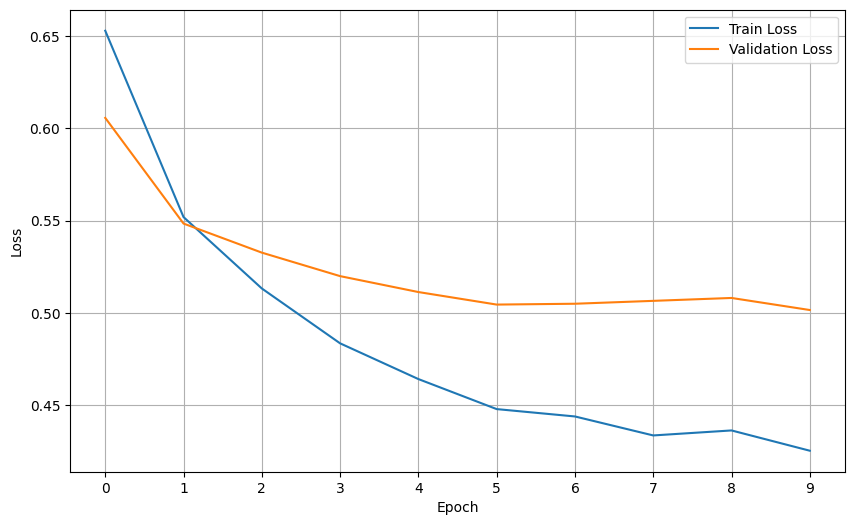

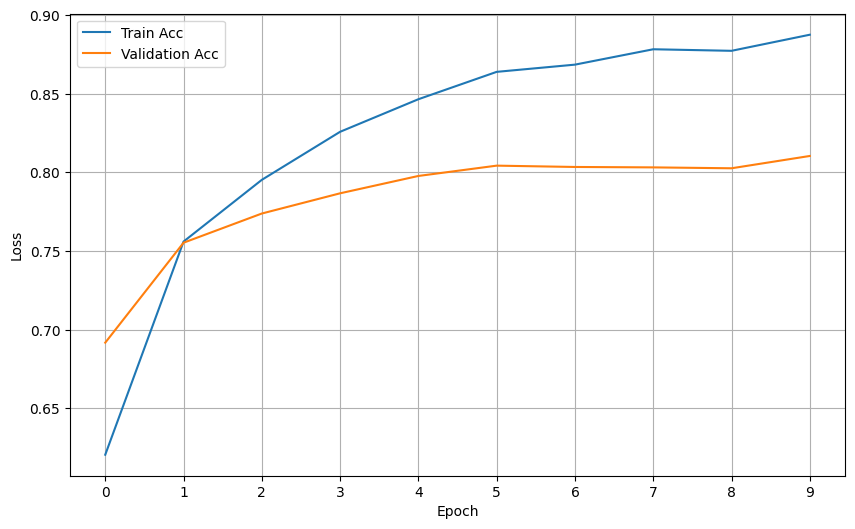

In [9]:
# Plot the loss graph
pipeline_augmented_LSTM.plot_loss()
pipeline_augmented_LSTM.plot_acc()